In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import io

Первый приме использования функционального api

In [33]:
input_tensor = tf.keras.Input((214, 214, 3))
conv_model_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(input_tensor)
conv_model_layer = tf.keras.layers.MaxPooling2D((2, 2))(conv_model_layer)
conv_model_layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.MaxPooling2D((2, 2))(conv_model_layer)
conv_model_layer = tf.keras.layers.Conv2D(64, (3, 3), activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.MaxPooling2D((2, 2))(conv_model_layer)
conv_model_layer = tf.keras.layers.Conv2D(64, (3, 3), activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.MaxPooling2D((2, 2))(conv_model_layer)
conv_model_layer = tf.keras.layers.Conv2D(128, (3, 3), activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.MaxPooling2D((2, 2))(conv_model_layer)
conv_model_layer = tf.keras.layers.Conv2D(128, (3, 3), activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.Flatten()(conv_model_layer)
conv_model_layer = tf.keras.layers.Dense(32, activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.Dense(64, activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.Dense(128, activation="relu")(conv_model_layer)
conv_model_layer = tf.keras.layers.Dense(1, activation="sigmoid")(conv_model_layer)

conv_model = tf.keras.Model(input_tensor, conv_model_layer)
conv_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)
conv_model.summary()



Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 214, 214, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 212, 212, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 106, 106, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 104, 104, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 52, 52, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 64)        1849

Тестирование модели на фиктиных данных

In [34]:
def generate_data(train_samples_count, test_samples_count, image_size_x, image_size_y):

    base_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\data_set"
    
    train_dir = os.path.join(base_dir, "train")
    test_dir = os.path.join(base_dir, "test")

    train_normal_img_dir = os.path.join(train_dir, "normal")
    train_student_img_dir = os.path.join(train_dir, "student")
    test_normal_img_dir = os.path.join(test_dir, "normal")
    test_student_img_dir = os.path.join(test_dir, "student")

    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(test_dir)
    os.mkdir(train_normal_img_dir)
    os.mkdir(train_student_img_dir)
    os.mkdir(test_normal_img_dir)
    os.mkdir(test_student_img_dir)
    
    samples_train_tensor = np.zeros(shape=(train_samples_count, image_size_x, image_size_y, 3))
    labels_train_tensor = np.zeros(shape=(train_samples_count))
    
    samples_test_tensor = np.zeros(shape=(test_samples_count, image_size_x, image_size_y, 3))
    labels_test_tensor = np.zeros(shape=(test_samples_count))


    for label in ["normal", "student"]:
        for sample in range(train_samples_count):
            if label == "normal":
                image = np.random.normal(0.0, 256.0, (image_size_x, image_size_y, 3))
                labels_train_tensor[sample] = 1.
                samples_train_tensor[sample, :, :, :] = image
                cv2.imwrite(f"{train_normal_img_dir}\\{sample}.jpg", image)

            else:
                image = np.random.normal(0.0, 256.0, (image_size_x, image_size_y, 3))
                labels_train_tensor[sample] = 0.
                samples_train_tensor[sample, :, : :] = np.random.standard_t(12.3, (image_size_x, image_size_y, 3))
                cv2.imwrite(f"{train_student_img_dir}\\{sample}.jpg", image)

        for sample in range(test_samples_count):
            if label == "normal":
                image = np.random.normal(0.0, 256.0, (image_size_x, image_size_y, 3))
                labels_train_tensor[sample] = 1.
                samples_train_tensor[sample, :, :, :] = np.random.normal(0.0, 256.0, (image_size_x, image_size_y, 3))
                cv2.imwrite(f"{test_normal_img_dir}\\{sample}.jpg", image)
            
            else:
                image = np.random.normal(0.0, 256.0, (image_size_x, image_size_y, 3))
                labels_test_tensor[sample] = 0.
                samples_test_tensor[sample, :, : :] = np.random.standard_t(12.3, (image_size_x, image_size_y, 3))
                cv2.imwrite(f"{test_student_img_dir}\\{sample}.jpg", image)
    
    

    
            




In [35]:
generate_data(image_size_x=214, image_size_y=214,
              train_samples_count=2000, test_samples_count=1000)

In [36]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [37]:
test_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\data_set\\test"
train_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\data_set\\train"


In [38]:
train_data = data_generator.flow_from_directory(train_dir,
                                                target_size=(214, 214),
                                                class_mode="binary",
                                                batch_size=32)

test_data = data_generator.flow_from_directory(test_dir,
                                               target_size=(214, 214),
                                               class_mode="binary",
                                               batch_size=32)


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
cm_history = conv_model.fit_generator(train_data,
                         steps_per_epoch=30,
                         epochs=20,
                         validation_data=test_data,
                         validation_steps=30)


C:\Users\1\AppData\Local\Temp\ipykernel_2696\1768115307.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cm_history = conv_model.fit_generator(train_data,


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 0.6944 - acc: 0.4948

KeyboardInterrupt: 

In [ ]:
losses_history = [np.asarray(cm_history.history["loss"]), np.asarray(cm_history.history["val_loss"])]
acces_history = [np.asarray(cm_history.history["acc"]), np.asarray(cm_history.history["val_acc"])]
colors_list = ["red", "blue"]
labels_list = [["loss", "acc"], ["val loss", "val acc"]]


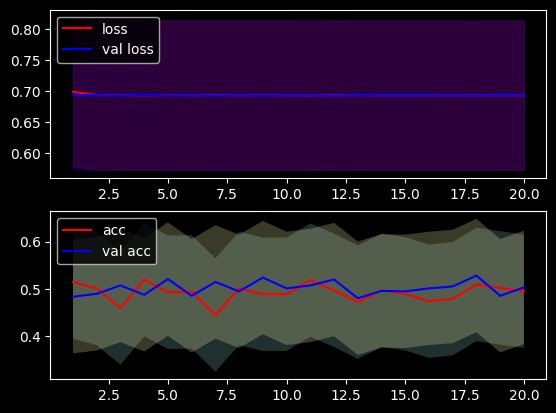

In [ ]:
plt.style.use("dark_background")
fig, axis = plt.subplots(nrows=2)

for (loss, acc, color, label) in zip(losses_history, acces_history, colors_list, labels_list):
    axis[0].plot(range(1, loss.shape[0] + 1), loss, color=color, label=label[0])
    axis[0].fill_between(range(1, loss.shape[0] + 1), loss - 0.12, loss + 0.12, color=color, alpha=0.23)
    axis[1].plot(range(1, acc.shape[0] + 1), acc, color=color, label=label[1])
    axis[1].fill_between(range(1, acc.shape[0] + 1), acc - 0.12, acc + 0.12, alpha=0.23)

axis[0].legend(loc="upper left")
axis[1].legend(loc="upper left")
plt.show()

In [40]:
images_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\data_set\\test\\normal"
image_tensor = np.zeros(shape=(100, 214, 214, 3))
for image_index in range(image_tensor.shape[0]):
    image = cv2.imread(f"C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\data_set\\test\\normal\\{image_index}.jpg")
    image = np.asarray(image)
    image_tensor[image_index, :, :, :] = image

prediction = conv_model.predict(image_tensor)
print(prediction)

4/4 [==============================] - 1s 106ms/step
[[0.7658848 ]
 [0.77272594]
 [0.7800522 ]
 [0.7752941 ]
 [0.8031993 ]
 [0.7843379 ]
 [0.8022899 ]
 [0.7786607 ]
 [0.7742541 ]
 [0.78346694]
 [0.7771964 ]
 [0.78364104]
 [0.7740523 ]
 [0.8024592 ]
 [0.7836257 ]
 [0.79062337]
 [0.79542863]
 [0.78226626]
 [0.7997332 ]
 [0.7943563 ]
 [0.76638335]
 [0.7945302 ]
 [0.79840744]
 [0.7728773 ]
 [0.7858824 ]
 [0.8048706 ]
 [0.7526049 ]
 [0.8039501 ]
 [0.81048137]
 [0.77407694]
 [0.80330634]
 [0.7948733 ]
 [0.7871935 ]
 [0.7721282 ]
 [0.7976    ]
 [0.80125296]
 [0.8176216 ]
 [0.7844957 ]
 [0.8093473 ]
 [0.8007831 ]
 [0.80286604]
 [0.76564926]
 [0.7871427 ]
 [0.781423  ]
 [0.78418475]
 [0.8036742 ]
 [0.78212017]
 [0.7933997 ]
 [0.7842551 ]
 [0.78641796]
 [0.7682412 ]
 [0.82042795]
 [0.8057448 ]
 [0.7721656 ]
 [0.7777675 ]
 [0.76450807]
 [0.8044549 ]
 [0.77484196]
 [0.7751513 ]
 [0.7743131 ]
 [0.7657181 ]
 [0.8004438 ]
 [0.7841861 ]
 [0.7895572 ]
 [0.8142802 ]
 [0.77701205]
 [0.7784457 ]
 [0.79184

In [ ]:
# text_vocabulary_size = 10000
# question_vocabulary_size = 10000
# answer_vocabulary_size = 500

# text_input = tf.keras.Input(shape=(None, ), dtype="int32", name="text")
# embedded_text = tf.keras.layers.Embedding(text_vocabulary_size, 64)(text_input)
# encoded_text = tf.keras.layers.LSTM(32)(embedded_text)
# question_input = tf.keras.Input(shape=(None, ), dtype="int32", name="question")
# embedded_question = tf.keras.layers.Embedding(question_vocabulary_size, 32)(question_input)
# encoded_question = tf.keras.layers.LSTM(16)(embedded_question)

# concatenate = tf.keras.layers.concatenate([encoded_text, encoded_question], axis=-1)
# answer = tf.keras.layers.Dense(answer_vocabulary_size, activation="softmax")(concatenate)

# model = tf.keras.Model([text_input, question_input], answer)
# model.compile(
#     optimizer="rmsprop",
#     loss="categorical_crossentropy",
#     metrics=["acc"]
# )

In [ ]:
# num_samples = 1000
# max_length = 100

# text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
# question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
# answer = np.zeros(shape=(num_samples, answer_vocabulary_size))
# indices = np.random.randint(0, answer_vocabulary_size, size=num_samples)
# for (index, x) in enumerate(answer):
#     x[indices[index]] = 1

# model.fit([text, question], answer, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 3s 56ms/step - loss: 6.2146 - acc: 0.0020
Epoch 2/10
8/8 [==============================] - 0s 55ms/step - loss: 6.2095 - acc: 0.0050
Epoch 3/10
8/8 [==============================] - 0s 55ms/step - loss: 6.2057 - acc: 0.0060
Epoch 4/10
8/8 [==============================] - 0s 60ms/step - loss: 6.2019 - acc: 0.0050
Epoch 5/10
8/8 [==============================] - 0s 55ms/step - loss: 6.1975 - acc: 0.0070
Epoch 6/10
8/8 [==============================] - 0s 55ms/step - loss: 6.1906 - acc: 0.0060
Epoch 7/10
8/8 [==============================] - 0s 51ms/step - loss: 6.1689 - acc: 0.0030
Epoch 8/10
8/8 [==============================] - 0s 56ms/step - loss: 6.1296 - acc: 0.0060
Epoch 9/10
8/8 [==============================] - 0s 55ms/step - loss: 6.0936 - acc: 0.0070
Epoch 10/10
8/8 [==============================] - 0s 56ms/step - loss: 6.0628 - acc: 0.0080


Модель с несколькими выходами

In [42]:
vocabulary_size = 5000
num_income_groups = 10

posts_input = tf.keras.Input(shape=(None, ), dtype="int32", name="posts")
embedded_posts = tf.keras.layers.Embedding(256, vocabulary_size)(posts_input)
x_layer = tf.keras.layers.Conv1D(128, 5, activation="relu")(embedded_posts)
x_layer = tf.keras.layers.MaxPooling1D(5)(x_layer)
x_layer = tf.keras.layers.Conv1D(256, 5, activation="relu")(x_layer)
x_layer = tf.keras.layers.Conv1D(256, 5, activation="relu")(x_layer)
x_layer = tf.keras.layers.MaxPooling1D(5)(x_layer)
x_layer = tf.keras.layers.Conv1D(256, 5, activation="relu")(x_layer)
x_layer = tf.keras.layers.Conv1D(256, 5, activation="relu")(x_layer)
x_layer = tf.keras.layers.GlobalMaxPooling1D()(x_layer)
x_layer = tf.keras.layers.Dense(128, activation="relu")(x_layer)

age_prediction = tf.keras.layers.Dense(1, name="age")(x_layer)
income_prediction = tf.keras.layers.Dense(num_income_groups, activation="softmax", name="income")(x_layer)
gender_prediction = tf.keras.layers.Dense(1, activation="sigmoid", name="gender")(x_layer)

model = tf.keras.Model(posts_input, 
                       [age_prediction, income_prediction, gender_prediction])

model.compile(optimizer="rmsprop",
              loss={
                  "age": "mse",
                  "income": "categorical_crossentropy",
                  "gender": "binary_crossentropy"
              },
              metrics={
                  "age": "mae",
                  "income": "acc",
                  "gender": "acc"
              },
              loss_weights={
                  "age": 0.25,
                  "income": 1.,
                  "gender": 10.
              })


реализация графоподобной сети inception

In [ ]:
x_input_layer = tf.keras.Input((214, 214, 3))

branch_layer_a = tf.keras.layers.Conv2D(128, (1, 1), strides=2, activation="relu")(x_input_layer)

branch_layer_b = tf.keras.layers.Conv2D(128, (1, 1), activation="relu")(x_input_layer)
branch_layer_b = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation="relu")(branch_layer_b)

branch_layer_c = tf.keras.layers.AvgPool2D((3, 3), strides=2)(x_input_layer)
branch_layer_c = tf.keras.layers.Conv2D(128, (3, 3), activation="relu")(branch_layer_c)

branch_layer_d = tf.keras.layers.Conv2D(128, (1, 1), activation="relu")(x_input_layer)
branch_layer_d = tf.keras.layers.Conv2D(128, (3, 3), activation="relu")(branch_layer_d)
branch_layer_d = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation="relu")(branch_layer_d)

output_layer = tf.keras.layers.concatenate([branch_layer_a, branch_layer_b, branch_layer_c, branch_layer_d], axis=-1)


пример повторного использования остаточных весов

In [ ]:
lstm_layer = tf.keras.layers.LSTM(23)

left_input = tf.keras.Input(shape=(None, 128))
left_output = lstm_layer(left_input)

right_input = tf.keras.Input(shape=(None, 128))
right_output = lstm_layer(right_input)

merged_layer = tf.keras.layers.concatenate([left_output, right_output], axis=-1)
predictions_layer = tf.keras.layers.Dense(1, activation="sigmoid")(merged_layer)

model = tf.keras.Model([left_input, right_input], predictions_layer)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)


Повторное использование модели как слоя для обработки разных водов

In [6]:
xecption_model = tf.keras.applications.Xception(weights=None, include_top=False)

rights_image = tf.keras.Input((214, 214, 3))
left_image = tf.keras.Input((214, 214, 3))

right_image_output = xecption_model(rights_image)
left_image_output = xecption_model(left_image)
concatenate_layer = tf.keras.layers.concatenate([rights_image, left_image], axis=-1)

print(concatenate_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 214, 214, 6), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
